In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.stats.stats import pearsonr

# 1. Read the data into python

In [2]:
# Reading the dataset to the python environment
data=pd.read_csv('Week_7_Activity_data.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843
2007,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
2008,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
2009,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


# 2. Check for null values

In [3]:
# Checking for null values
pd.isnull(data).sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
dtypes: float64(9)
memory usage: 141.5 KB


# 3. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and comment on your observations

In [5]:
# Statistical Summary of the dataset
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177
75%,8.052969,216.441070,27182.587065,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749


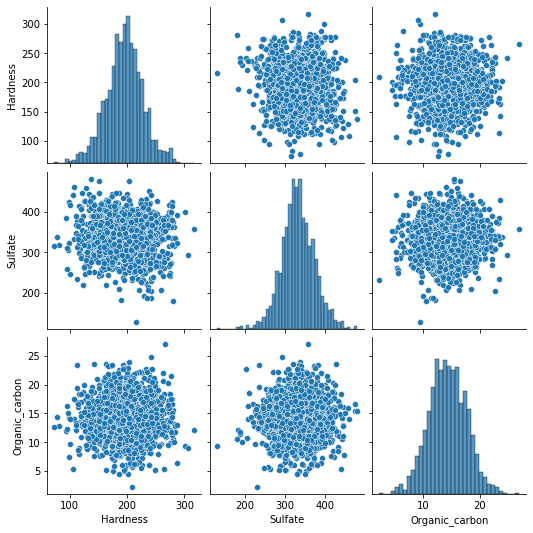

In [6]:
# Plotting Pairplot of ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’
sns.pairplot(data[['Hardness','Sulfate','Organic_carbon']])

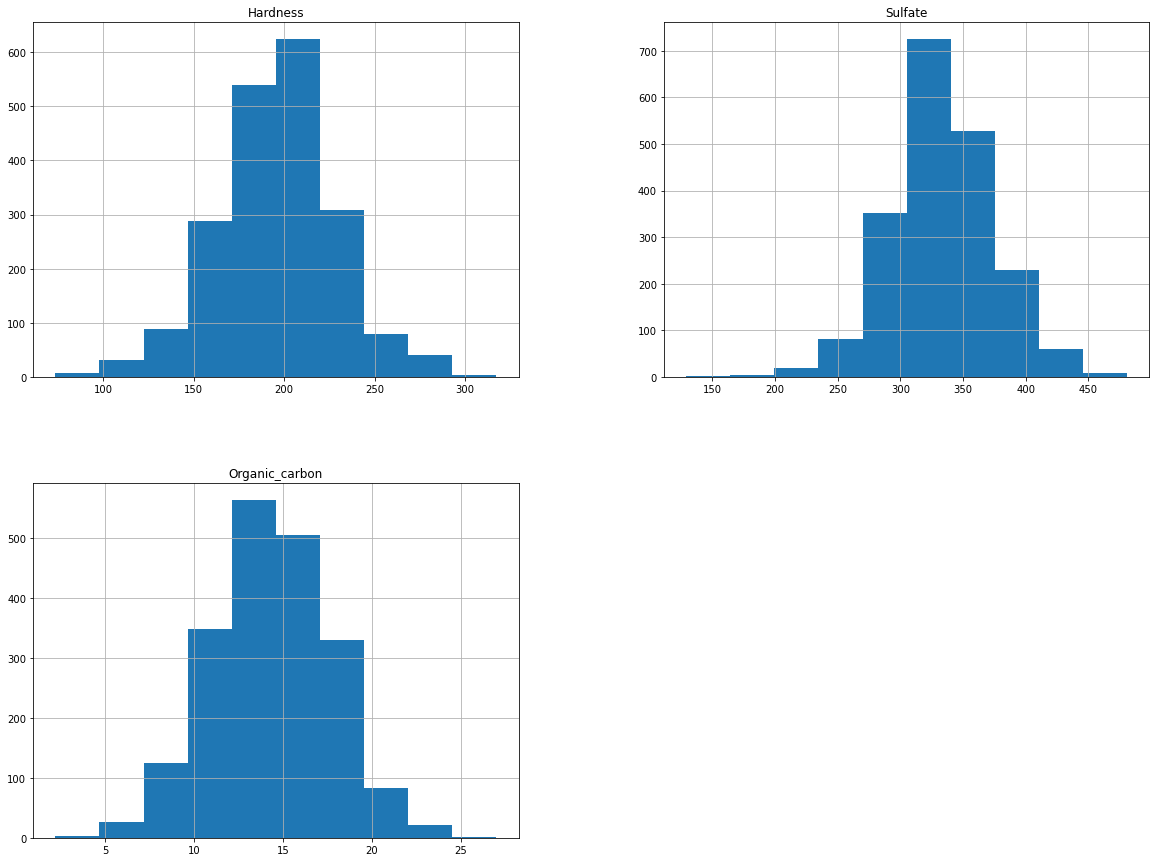

In [7]:
# Plotting histogram of ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’
freqgraph = data[['Hardness','Sulfate','Organic_carbon']]   #selecting variables to plot
freqgraph.hist(figsize=(20,15))      #plotting the histogram
plt.show()

### OBSERVATIONS

i. From the pairplot it shows that the correlation between ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ is very low.

ii. From the plot it is well clear that, three of them are almost normally distributed with bell shaped, and is symmetric about the mean. And also it is showing that the data near the mean are more frequent in occurrence than the data far from mean.

iii. From the pairplot and histogram, we can see that the range of Organic_carbon is very small comapred to sulphate and hardness.

iv. Mean and standard deviation of Organic_carbon is very low compared to other two. (Mean=14.36, std=3.324)

v. Among 3, sulphate posses high value of mean and standard deviation. (Mean=333.22, std=41.20)

# 4. Carry out correlation analysis on the dataset and find the correlation factor between
### a. ph and Chloramines
### b. ph and Conductivity

In [8]:
# Correlation matrix
corrmatrix = data.corr()
corrmatrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000


<AxesSubplot:>

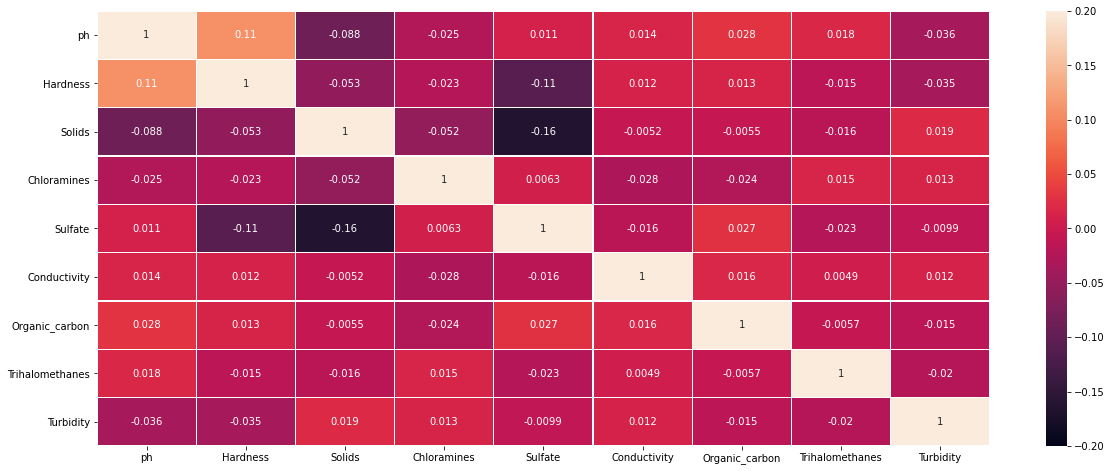

In [9]:
# Heatmap for correlation matrix
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.2,vmax=0.2,annot=True,linewidth=0.2)

### INFERENCE

- There is no strong positive or strong negative correlation between the variables.
- Sulphate and solids shows the low negative correlation of -1.6.
- Ph and hardness shows the low positive correlation of 0.11.

### 4.a. Correlation factor between ph and Chloramines

In [10]:
# Method 1
# Using scipy to calculate the pearson correlation coefficient between ph and Chloramines
ph = data['ph']
chloramines = data['Chloramines']

pearsonr_coefficient, p_value = pearsonr(ph,chloramines)
print('pearsonR correlation coefficient %0.3f' % (pearsonr_coefficient))

pearsonR correlation coefficient -0.025


In [11]:
# Method 2
x = data[['ph', 'Chloramines']]
x.corr()

,ph,Chloramines
ph,1.000000,-0.024768
Chloramines,-0.024768,1.000000


<AxesSubplot:xlabel='ph', ylabel='Chloramines'>

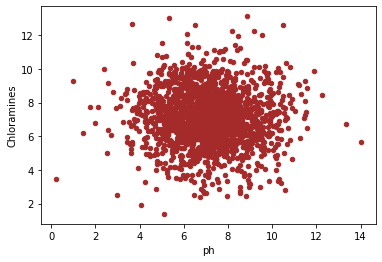

In [12]:
# Plotting scatterplot of ph and Chloramines
data.plot(kind='scatter', x='ph', y='Chloramines', color='brown')

### INFERENCE

- Ph and Chloramines have low negative Correlation coefficient of -0.025.
- That is the relationship between variables Ph and Chloramines are exist but exactly in a opposite direction.
- If one variable increases as the other decreases.
- The scatter plot shows that there is no linear correlation between the variables hence the values are clustered.

### 4.b. Correlation factor between ph and Conductivity

In [13]:
# Method 1
# Using scipy to calculate the pearson correlation coefficient between ph and Conductivity
ph = data['ph']
conductivity = data['Conductivity']

pearsonr_coefficient, p_value = pearsonr(ph,conductivity)
print('pearsonR correlation coefficient %0.3f' % (pearsonr_coefficient))

pearsonR correlation coefficient 0.014


In [14]:
# Method 2
x = data[['ph', 'Conductivity']]
x.corr()

,ph,Conductivity
ph,1.000000,0.014128
Conductivity,0.014128,1.000000


<AxesSubplot:xlabel='ph', ylabel='Conductivity'>

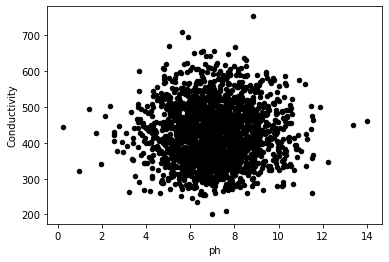

In [15]:
# Plotting scatterplot of ph and Conductivity
data.plot(kind='scatter', x='ph', y='Conductivity', color='black')

### INFERENCE

- Ph and conductivity have low positive Correlation coefficient of 0.014.
- A weak positive correlation indicates that both the variables tend to go up in the response to one another,the relationship between Ph and Conductivity is not very strong.
- The scatter plot shows that there is no linear correlation between the variables, hence the values are clustered.